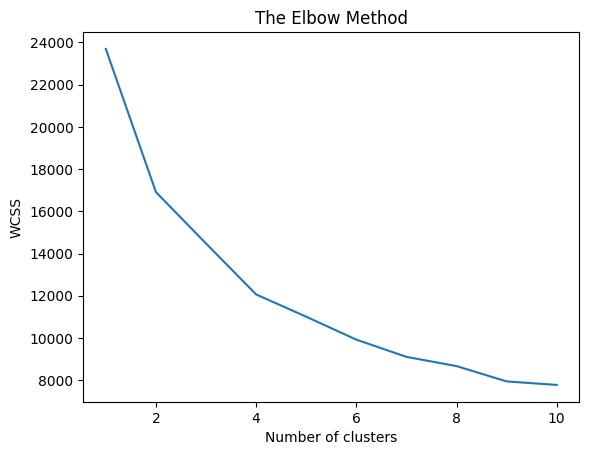

[0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0
 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1
 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0
 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0
 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0
 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0
 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1
 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 1 0 1 1 1 

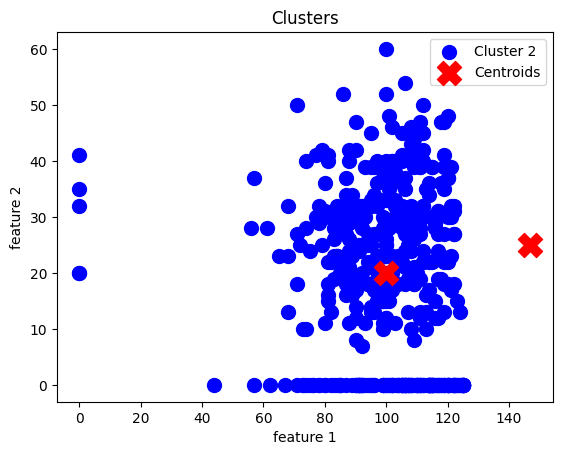

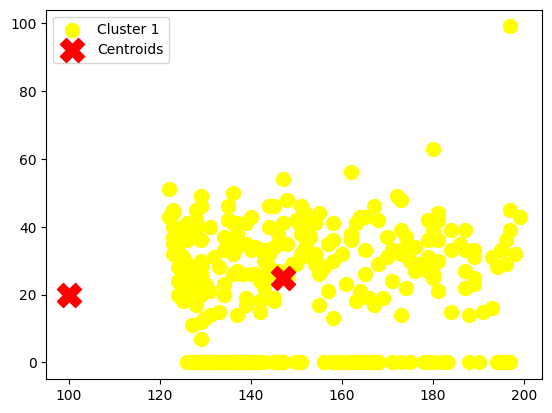

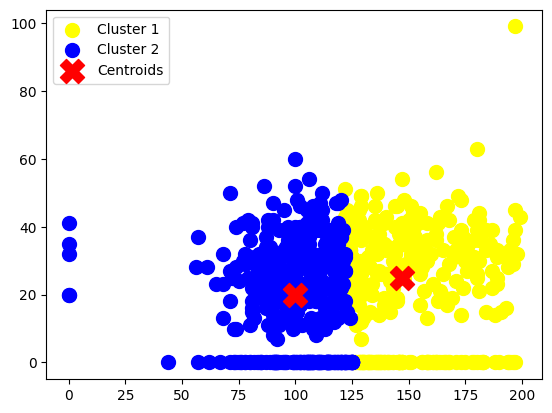

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as pl
import matplotlib.pyplot as p

# Load the dataset
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, [1,3]].values

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, init='k-medoids++', random_state=42)
    kmedoids.fit(X)
    wcss.append(kmedoids.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Training the K-Medoids model on the dataset
kmedoids = KMedoids(n_clusters=2, init='k-medoids++', random_state=0)
y_kmedoids = kmedoids.fit_predict(X)
print(y_kmedoids)
medoids = kmedoids.cluster_centers_
print("Medoids' values:")
print(medoids)

# Visualising the clusters
plt.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1],marker='X', s=300, c='red', label='Centroids')
plt.title('Clusters')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()
pl.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s=100, c='yellow', label='Cluster 1')
pl.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1],marker='X', s=300, c='red', label='Centroids')
pl.legend()
pl.show()
p.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s=100, c='yellow', label='Cluster 1')
p.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s=100, c='blue', label='Cluster 2')
p.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1],marker='X', s=300, c='red', label='Centroids')
p.legend()
p.show()